# Project 5: Fluorescence intensity and shape of phytoplankton cells

In this project the goal is to detect phytoplankton cells in gray-channel images and use the obtained coordinates to measure texture traits (intensities and statistical moments) in fluorescence channels of the same images.   

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_5_before.jpg)

**Input** - Phytoplankton fluorescence. Each sample includes 1 brightfield gray scale image and 3 fluorescence images at different wavelengths.
</div>
<div class="col-md-6" style="flex: 1 1 0px;">
    
![After](_figures/project_5_after.jpg)

**Results** - Phenopype `thresholding` function detects the contours of phytoplankton cells (green) and holes within (red).</div>
</div>

Images kindly provided by Irene Gallego and Anita Narwani.

## Background

A plate reader creates four images of the same set of objects: bright field gray scale images, and three different fluoresccence channels to represent different photopigments. All four images show the same objects, but with different pixel intensities. We will use the contour outline from the brightfield images, which are processed with the high-throughput workflow, as a stencil to extract texture information from the same coordinates in the fluorescence channels.

<center>
<div style="width:600px; text-align: left" >
<img src="_figures/project_5_stencil.png">
    
**Fig. 1:** Each sample includes four images: 1 brightfield (top) and 3 fluorescence measurements (black, bottom). Due to different pigments, not all spcecies are visible in each image, because of different emission spectra. For example, the two long string shaped cells marked with the green circles only occur in two of the fluorescence channels, but not the third one or the brightfield. 
    
</div>
</center>

## Preparation

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "project_5"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")
    

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_5.yaml


## Project

### Find objects in brightfield images

In [2]:
proj = pp.Project("project")

--------------------------------------------
Creating a new phenopype project directory at:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project

Proceed? (y/n)
y

Project "project" successfully created.
--------------------------------------------


In [3]:
## add all phytoplankton images from the data folder, but exclude fluorescence channels
proj.add_files(image_dir = r"../../gallery/data", include="phyto", exclude="FL")

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: phyto, exclude: FL, mode: copy, recursive: False, resize: False, unique: path

Found image phyto1_BF.tif - phenopype-project folder 0__phyto1_BF created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\phyto1_BF.tif
Found image phyto2_BF.tif - phenopype-project folder 0__phyto2_BF created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\phyto2_BF.tif
Found image phyto3_BF.tif - phenopype-project folder 0__phyto3_BF created
D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data\phyto3_BF.tif

Found 3 files
--------------------------------------------


In [4]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1")

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\data\0__phyto1_BF\pype_config_v1.yaml
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\data\0__phyto2_BF\pype_config_v1.yaml
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\data\0__phyto3_BF\pype_config_v1.yaml


<center>
<div style="width:600px; text-align: left" >
<img src="_figures/project_5_edit_contours.gif">
    
**Fig. 2:** Use the `edit_contour` function to remove unwanted objects, e.g. cells that are broken, too small, or other unwanted junk and detritus.
    
</div>
</center>

In [5]:
## run image processing (`window_max_dim` controls the window size of all GUI functions in the Pype config)
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", window_max_dim=1750) 

Format path to abspath

AUTOLOAD
 - nothing to autoload
updating pype config file


------------+++ new pype iteration 2022-01-17 22:16:53 +++--------------




PREPROCESSING
blur


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
morphology
morphology
detect_contour
- found 89 contours that match criteria
edit_contour
BIER
detect_contour
- found 71 contours that match criteria


VISUALIZATION
select_canvas
- raw image
draw_contour


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\data\0__phyto1_BF\canvas_v1.jpg.
save_annotation
- creating new annotation file
- writing annotation of type "contour" with id "a" to "annotations_v1.json"
- writing annotation of type "contour" with id "b" to "annotations_v1.json"
- writing annotation of type "drawing" with id "a" to "annotations_v1.json"


------------+++ finished pype iteration +++--------------
-------(End w

### Compute shape features of cells in brightfield images

The shape features say something about cell morphology, which is why we only one intact cells. Since the fluorescence channels may not tell us whether a cell is intact or not, we only compute those features in the objects detected in the brightfield images. 

In [6]:
## use `edit_config`´to inject `compute_shape_features` into the configuration files
## this makes the initial image processing faster, as this step is somehwat computationally intensive 
target1 = """    - export:"""
replacement1 = """    - measurement:
        - compute_shape_features:
            features: ["basic","moments","hu_moments"]
    - export:"""
proj.edit_config(tag="v1", target=target1, replacement=replacement1)

# phenopype gallery project 3
# ---------------------------
# detect phytoplankton contours

config_info:
    config_name: pype_config_v1.yaml
    date_created: '2022-01-17 22:16:49'
    date_last_modified:
    template_name: gallery_project_5.yaml
    template_path: D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_5.yaml
processing_steps:
    - preprocessing:
        - blur:
            kernel_size: 9
    - segmentation:
        - threshold:
            method: adaptive
            blocksize: 299
            constant: 10
        - morphology:
            operation: open
            shape: cross
            kernel_size: 5
            iterations: 1
        - morphology:
            operation: close
            shape: ellipse
            kernel_size: 3
            iterations: 3
        - detect_contour:
            ANNOTATION: {type: contour, id: a, edit: overwrite}
            min_area: 150
        - edit_contour:
            ANNOTATION: {type: draw

In [7]:
## run pype again, but without visual feedback to speed things up
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", feedback=False)
  

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"contour": ["a", "b"],
"drawing": ["a"]
}
updating pype config file


------------+++ new pype iteration 2022-01-17 22:18:56 +++--------------




PREPROCESSING
blur


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
morphology
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 89 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=False)
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 71 contours that match criteria


VISUALIZATION
select_canvas
- raw image
draw_contour


MEASUREMENT
compute_shape_features


EXPORT
save_canvas
- image saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\projec

### Compute texture featues of cells in fluorescence images

This procedure uses the contour information we collected in the high-throughput workflow above. It provides all object coordinates to the `compute_texture_features` function, which, if also supplied with the fluorescence channel images, extrace texture featues from those coordinates. This code snippet shows that the low-throughput workflow, i.e., writing phenopype functions in pure Python code, can also have its use. 

In [8]:
for path in proj.dir_paths:
    
    ## the _load_yaml function is part of the private API, and used here to load the attributes file to get the image name
    attributes = pp.utils_lowlevel._load_yaml(os.path.join(path, "attributes.yaml"))
    image_stem = attributes["image_original"]["filename"].partition('_')[0]
    
    ## we load the annotations collection in the high throughput workflow above - we need the contour coordinates of each object
    annotations = pp.export.load_annotation(os.path.join(path, "annotations_v1.json"))
    
    ## we now loop through the files in the data folder, which are named like the brightfield image, and load those images
    for channel in ["FL1","FL2","FL3"]:
        image_fluorescence_path = os.path.join( r"../../gallery/data", image_stem + "_" + channel + ".tif")
        image_fluorescence = pp.load_image(image_fluorescence_path)
        
        ## using the fluorescence image and the contours, we can compute texture features for each object. this is somewhat computationally intensive
        annotations = pp.measurement.compute_texture_features(image_fluorescence, contour_id="b", annotations=annotations, annotation_id=channel)
    
    ## we store the textures back to the annotations file
    pp.export.save_annotation(annotations, dir_path = path, file_name="annotations_v1.json")
    

- no annotation_type selected - returning all annotations
- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 71/71 [00:00<00:00, 143.72it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 71/71 [00:00<00:00, 138.51it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 71/71 [00:00<00:00, 142.57it/s]


- loading existing annotation file
- annotation of type "contour" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "contour" with id "b" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "drawing" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "shape_features" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- writing annotation of type "texture_features" with id "FL1" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL2" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL3" to "annotations_v1.json"
- no annotation_type selected - returning all annotations
- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 85/85 [00:00<00:00, 142.17it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 85/85 [00:00<00:00, 139.51it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 85/85 [00:00<00:00, 140.73it/s]


- loading existing annotation file
- annotation of type "contour" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "contour" with id "b" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "drawing" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "shape_features" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- writing annotation of type "texture_features" with id "FL1" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL2" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL3" to "annotations_v1.json"
- no annotation_type selected - returning all annotations
- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 89/89 [00:00<00:00, 139.09it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 89/89 [00:00<00:00, 141.95it/s]


- decompose image: using gray channel


Processing gray channel texture features: 100%|███████████████████████████████████████| 89/89 [00:00<00:00, 141.47it/s]

- loading existing annotation file
- annotation of type "contour" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "contour" with id "b" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "drawing" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- annotation of type "shape_features" with id "a" already exists in "annotations_v1.json" (overwrite=False)
- writing annotation of type "texture_features" with id "FL1" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL2" to "annotations_v1.json"
- writing annotation of type "texture_features" with id "FL3" to "annotations_v1.json"


In [9]:
## this collects all annotations 
proj.collect_results(tag="v1", files="annotations",  folder="annotations", overwrite=True)

Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__phyto1_BF
0__phyto1_BF_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\results\annotations\0__phyto1_BF_annotations_v1.json.
Collected annotations_v1.json from 0__phyto2_BF
0__phyto2_BF_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\results\annotations\0__phyto2_BF_annotations_v1.json.
Collected annotations_v1.json from 0__phyto3_BF
0__phyto3_BF_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_5\project\results\annotations\0__phyto3_BF_annotations_v1.json.



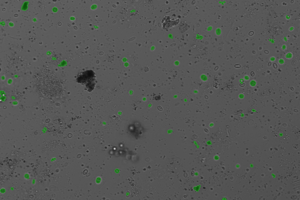
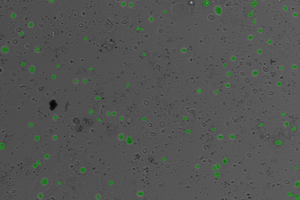
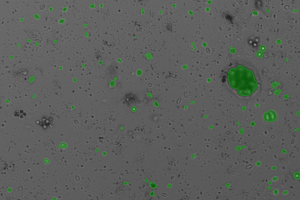


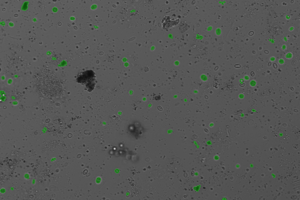
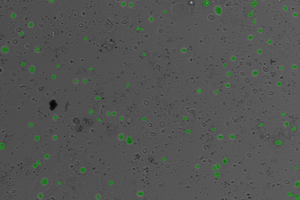
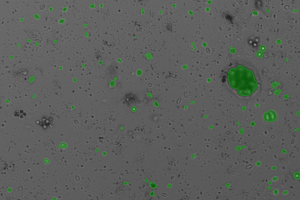

In [10]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)